In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df  = pd.read_csv('canada_per_capita_income.csv')

In [5]:
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [7]:
df.shape

(47, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [11]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [13]:
df.rename(columns={"per capita income (US$)": "income"}, inplace=True)

Text(0.5, 1.0, 'Scatter Plot of Years vs per capita income (US$)')

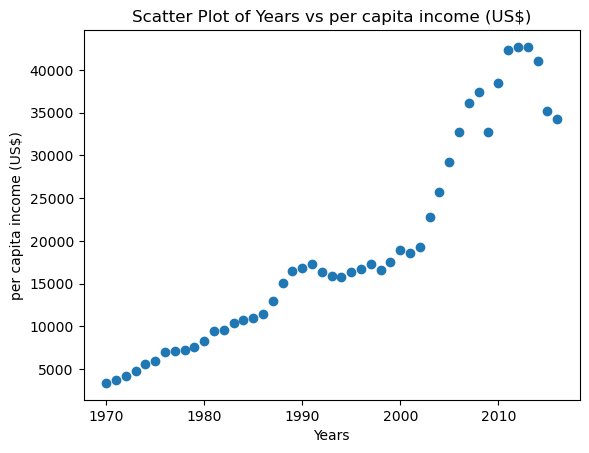

In [15]:
plt.scatter(df.year, df.income)
plt.xlabel("Years")
plt.ylabel("per capita income (US$)")
plt.title("Scatter Plot of Years vs per capita income (US$)")

In [17]:
X = df[['year']]
Y = df[['income']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [23]:
X_train

,year
8,1978
3,1973
6,1976
40,2010
33,2003
13,1983
17,1987
44,2014
15,1985
9,1979


In [25]:
y_train

,income
8,7247.967035
3,4804.463248
6,7062.131392
40,38420.522890
33,22739.426280
13,10416.536590
17,12974.806620
44,41039.893600
15,11018.955850
9,7602.912681


In [27]:
X_test

,year
27,1997
39,2009
26,1996
43,2013
24,1994
36,2006
12,1982
19,1989
4,1974
25,1995


In [29]:
y_test

,income
27,17310.757750
39,32755.176820
26,16699.826680
43,42676.468370
24,15755.820270
36,32738.262900
12,9619.438377
19,16426.725480
4,5576.514583
25,16369.317250


In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
lr.coef_

array([[815.14251301]])

In [35]:
lr.intercept_

array([-1605560.19879643])

In [37]:
lr.predict([[2020]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41027.67748165]])

In [41]:
y_pred = lr.predict(X_test)
y_pred

array([[22279.39968245],
       [32061.10983855],
       [21464.25716944],
       [35321.67989059],
       [19833.97214342],
       [29615.68229953],
       [10052.26198731],
       [15758.25957838],
       [ 3531.12188324],
       [20649.11465643]])

In [43]:
temp = np.c_[X_test, y_test, y_pred]
temp

array([[ 1997.        , 17310.75775   , 22279.39968245],
       [ 2009.        , 32755.17682   , 32061.10983855],
       [ 1996.        , 16699.82668   , 21464.25716944],
       [ 2013.        , 42676.46837   , 35321.67989059],
       [ 1994.        , 15755.82027   , 19833.97214342],
       [ 2006.        , 32738.2629    , 29615.68229953],
       [ 1982.        ,  9619.438377  , 10052.26198731],
       [ 1989.        , 16426.72548   , 15758.25957838],
       [ 1974.        ,  5576.514583  ,  3531.12188324],
       [ 1995.        , 16369.31725   , 20649.11465643]])

In [45]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["years", "per capita income (US$)","per capita income (US$)_predicted"])

,years,per capita income (US$),per capita income (US$)_predicted
0,1997.0,17310.757750,22279.399682
1,2009.0,32755.176820,32061.109839
2,1996.0,16699.826680,21464.257169
3,2013.0,42676.468370,35321.679891
4,1994.0,15755.820270,19833.972143
5,2006.0,32738.262900,29615.682300
6,1982.0,9619.438377,10052.261987
7,1989.0,16426.725480,15758.259578
8,1974.0,5576.514583,3531.121883
9,1995.0,16369.317250,20649.114656


In [64]:
mean_squared_error(y_test,y_pred)

15147815.5477862

In [62]:
r2_score(y_test,y_pred)

0.8751771396846304

In [59]:
lr.score(X_test,y_test)

0.8751771396846304